In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q -U kora


     |████████████████████████████████| 57 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 


In [3]:
from kora.drive import upload_public
# then display it
from IPython.display import HTML
from google.colab.patches import cv2_imshow


import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

cv2.__version__

'4.1.2'

In [4]:
filename = "archive\WADADA .mp4"
filename = '/content/drive/MyDrive/152_478_AI_2564_2/video_data/WADADA .mp4'


In [5]:
# capture the video
cap = cv2.VideoCapture(filename)

# check if capture was successful
if not cap.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width        = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height       = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps          = cap.get(cv2.CAP_PROP_FPS)
    
    print('Total frames: ' + str(total_frames))
    print('width: ' + str(width))
    print('height: ' + str(height))
    print('fps: ' + str(fps))

Video read successful!
Total frames: 7672
width: 854
height: 480
fps: 29.97


In [7]:
url = upload_public(filename)
HTML(f"""<video src={url} width=800 controls/>""")

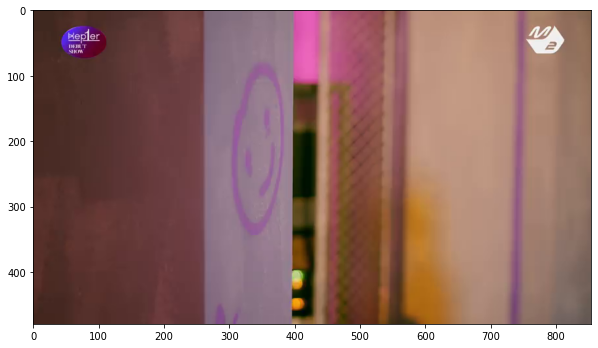

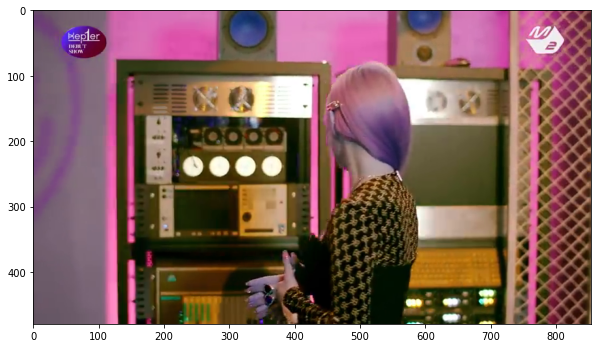

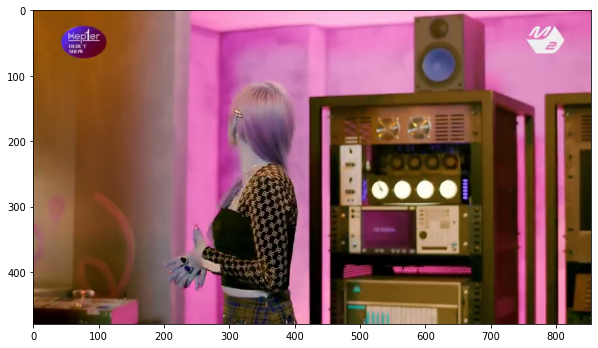

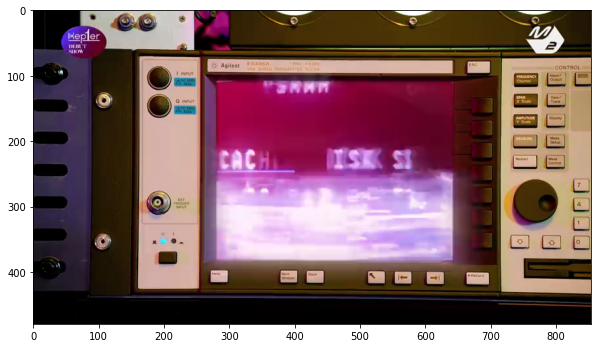

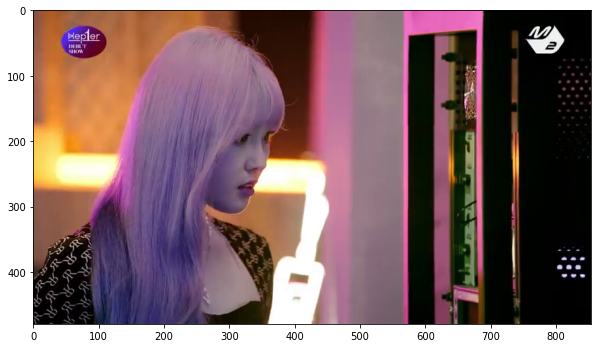

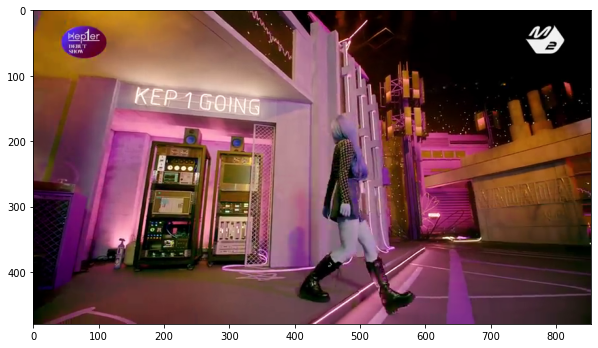

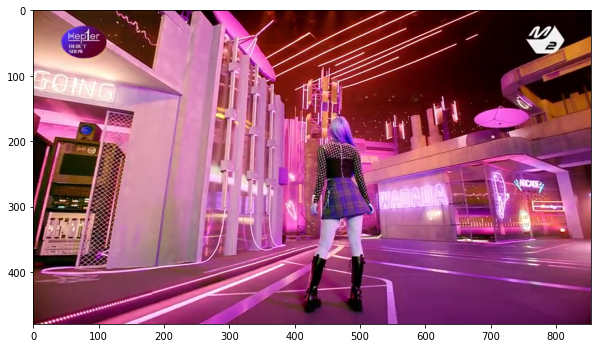

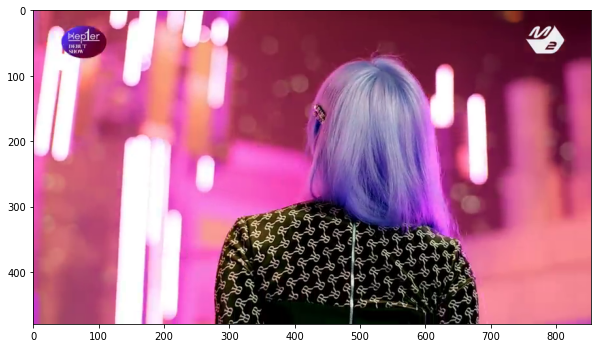

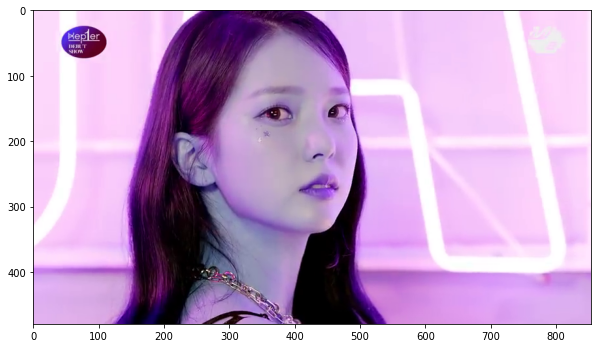

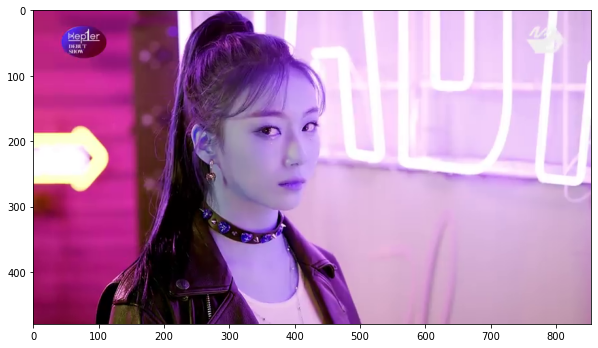

In [15]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out    = cv2.VideoWriter('output.mp4', fourcc, fps, (width,height))
    


cap = cv2.VideoCapture(filename)


for i in range(1000):

    cap.set(cv2.CAP_PROP_POS_FRAMES, i)    

   # Get the next frame, but don't decode if we're not using it.
    success    = cap.grab()

    ret, image = cap.retrieve()

    if  ret :
      out.write(image)


    
    if i%100 ==0 :
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.show()


out.release()      
cap.release()
